# Some Unsupervised Learning Algos (Python)

In [62]:
## General
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
## K Means
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
## Mean Shift
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
## SVM
from sklearn import svm
## Other models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

### K-Means Clustering (Flat Clustering)
Partitions observiations into k (chosen) clusters. Each sample's class is determined by whichever centroid it falls closest to.

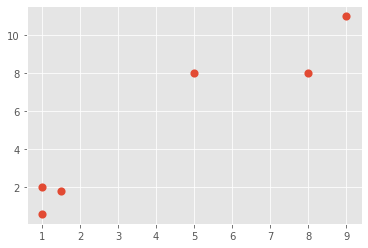

In [70]:
# EXAMPLE
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=10, linewidths = 5, zorder = 10)
plt.show()

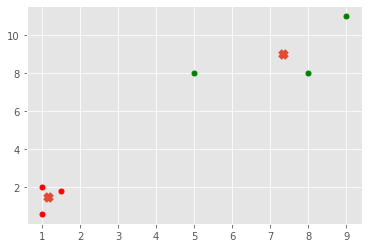

In [71]:
##fit KMeans classifier
clf = KMeans(n_clusters=2)
clf.fit(X)
centroids = clf.cluster_centers_ ##coordinates of cluster centroids
labels = clf.labels_  ##class labels for each sample
## Plot the clusters and show the calculated centroids
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10)
plt.show()

### Hierarchical Clustering - Mean Shift
Now we do not need to specify the number of clusters prior to training - the mean shift algorithm finds the clusters on its own. 
Mean Shift follows this process:
1. Initialize random seed (ie, the radius or bandwidth which encapsulates the current region of interest) and window W (the entire kernel).
2. Calculate the center of gravity (mean) of W.    
3. Shift the search window to the mean.    
4. Repeat Step 2-3 until convergence.

[[ 4.77040056  4.27476859  4.53558596]
 [ 0.9928037   0.59227387  0.95337917]
 [ 2.38026772  9.24078985 10.30038633]]
Number of estimated clusters: 3


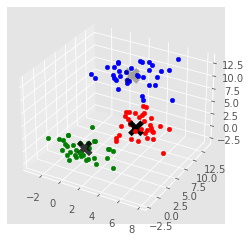

In [7]:
centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

# Clustering Algorigthms on Titanic Data

### Preprocess the data

In [34]:
## 'Real' Data Example: Titanic
## Read in data
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv") ##from github
titanic.columns = titanic.columns.str.lower() ##convert col names to lower
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
## aggregate 'cabin' into larger groups
titanic['cab'] = titanic['cabin'].str.replace('[^a-zA-Z]', '').fillna('miss') ##drop the nums from the cabin string, also fill the NaN category
## Dummy the categoricals
titanic = pd.get_dummies(titanic, columns = ['sex', 'cab', 'embarked'])
## Drop unwanted cols
titanic = titanic.drop(labels=['name','sex_male', 'cabin','ticket'],axis=1)

C:\Users\hanse\AppData\Local\Temp\ipykernel_8396\831223122.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic['cab'] = titanic['cabin'].str.replace('[^a-zA-Z]', '').fillna('miss') ##drop the nums from the cabin string, also fill the NaN category


In [36]:
# need to impute missing age values
titanic['age'].isna().sum()
titanic_cols = titanic.columns

In [39]:
## impute missings with KNN (k=5)
imputer = KNNImputer(n_neighbors=5, weights='uniform') ##from sklearn
titanic = imputer.fit_transform(titanic)
## convert the imputers output back into pd.DF 
titanic = pd.DataFrame(titanic)
titanic.columns = titanic_cols ##provide correct cols

## Titanic: K-Means

In [40]:
## Prepare X, y data for model
X = np.array(titanic.drop(labels='survived',axis=1)).astype(float)
X = preprocessing.scale(X) ##scale features - important for kmeans clustering 
y = np.array(titanic['survived'])

## K MEANS
kmeans_clf = KMeans(n_clusters=2) ##2 clusters: survived, or didn't survive
kmeans_clf.fit(X)

## Accuracy - not great
sum(kmeans_clf.predict(X) == titanic.survived) / len(titanic.survived)

0.6936026936026936

In [41]:
X.shape

(891, 27)

## Titanic: Mean Shift

In [50]:
## MEAN SHIFT
mshft_clf = MeanShift()
mshft_clf.fit(X)

labels = mshft_clf.labels_
cluster_centers = mshft_clf.cluster_centers_
##add cluster group to original data
titanic['cluster_group'] = np.nan
for i in range(len(X)): ##assign the cluster label for each sample
        titanic['cluster_group'].iloc[i] = labels[i]

##survival rates per group
#titanic.groupby('cluster_group').agg({'survived' : 'sum', 'passengerid' : 'count'})

In [56]:
## Examining variable statistics by cluster
titanic[['survived', 'age', 'sex_female', 'cluster_group']].groupby('cluster_group').describe()
## mean 'survived' is equivalent to the survival rate

survived                                                  age  \
                 count      mean       std  min   25%  50%  75%  max  count   
cluster_group                                                                 
0.0              686.0  0.298834  0.458081  0.0  0.00  0.0  1.0  1.0  686.0   
1.0               51.0  0.607843  0.493089  0.0  0.00  1.0  1.0  1.0   51.0   
2.0               35.0  0.742857  0.443440  0.0  0.50  1.0  1.0  1.0   35.0   
3.0               32.0  0.750000  0.439941  0.0  0.75  1.0  1.0  1.0   32.0   
4.0               32.0  0.750000  0.439941  0.0  0.75  1.0  1.0  1.0   32.0   
5.0               15.0  0.466667  0.516398  0.0  0.00  0.0  1.0  1.0   15.0   
6.0                8.0  0.875000  0.353553  0.0  1.00  1.0  1.0  1.0    8.0   
7.0                7.0  0.714286  0.487950  0.0  0.50  1.0  1.0  1.0    7.0   
8.0                4.0  0.500000  0.577350  0.0  0.00  0.5  1.0  1.0    4.0   
9.0                4.0  0.500000  0.577350  0.0  0.00  0.5  1.0  1.0    4.0   
10.0               3.0  0.000000  0.000000  0.0  0.00  0.0  0.0  0.0    3.0   
11.0               3.0  0.666667  0.577350  0.0  0.50  1.0  1.0  1.0    3.0   
12.0               2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0    2.0   
13.0               1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0    1.0   
14.0               1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0    1.0   
15.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
16.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
17.0               1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0    1.0   
18.0               1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0    1.0   
19.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
20.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   
21.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0    1.0   

                          ...               sex_female                      \
                    mean  ...     75%   max      count      mean       std   
cluster_group             ...                                                
0.0            27.981318  ...  34.425  74.0      686.0  0.314869  0.464803   
1.0            37.154235  ...  47.500  62.0       51.0  0.431373  0.500196   
2.0            36.780000  ...  44.500  70.0       35.0  0.628571  0.490241   
3.0            37.600000  ...  47.000  65.0       32.0  0.468750  0.507007   
4.0            39.000000  ...  49.500  63.0       32.0  0.562500  0.504016   
5.0            43.000000  ...  52.500  80.0       15.0  0.066667  0.258199   
6.0            16.687500  ...  30.250  36.5        8.0  0.500000  0.534522   
7.0            31.000000  ...  41.000  50.0        7.0  0.428571  0.534522   
8.0            11.480000  ...  19.750  25.0        4.0  0.750000  0.500000   
9.0            14.750000  ...  25.250  29.0        4.0  1.000000  0.000000   
10.0           28.666667  ...  33.500  42.0        3.0  0.000000  0.000000   
11.0           22.000000  ...  23.500  24.0        3.0  0.666667  0.577350   
12.0           19.500000  ...  20.250  21.0        2.0  1.000000  0.000000   
13.0           33.000000  ...  33.000  33.0        1.0  0.000000       NaN   
14.0           28.200000  ...  28.200  28.2        1.0  0.000000       NaN   
15.0           35.000000  ...  35.000  35.0        1.0  0.000000       NaN   
16.0           36.000000  ...  36.000  36.0        1.0  0.000000       NaN   
17.0           64.000000  ...  64.000  64.0        1.0  0.000000       NaN   
18.0           45.000000  ...  45.000  45.0        1.0  0.000000       NaN   
19.0           35.000000  ...  35.000  35.0        1.0  1.000000       NaN   
20.0           30.100000  ...  30.100  30.1        1.0  1.000000       NaN   
21.0           23.000000  ...  23.000  23.0        1.0  0.000000       NaN   

                                         
               min   25%  50%  75%  max  
clu

## Titanic: SVM

In [68]:
# Support Vector Machine Classifier
for k in ['linear', 'poly', 'rbf', 'sigmoid',]: ##try each kernel to compare accuracies
    svm_clf = svm.SVC(kernel=k)
    svm_clf.fit(X, y)
    ##predict fitted model back onto X
    y_pred = svm_clf.predict(X)
    ##calculate accuracy
    f_acc = metrics.accuracy_score(y, y_pred)
    print(k,":", f_acc)

linear : 0.792368125701459
poly : 0.7845117845117845
rbf : 0.8327721661054994
sigmoid : 0.7699214365881033


## Comparison to supervised learning models

Let's compare this to a supervised learning model - after all, we have labels

In [57]:
## Random Forest (w/ cross validation)
rf_mod = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=10,max_features=3)
cv_folds = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
cv_scores = cross_val_score(rf_mod, X, y, scoring='accuracy', cv=cv_folds, n_jobs=-1)

## Accuracy
print("Mean CV Accuracy: ", np.mean(cv_scores))

## no cv
rf_mod.fit(X, y,)
y_pred = rf_mod.predict(X)

print("Training Accuracy: ", metrics.accuracy_score(y, y_pred))
#rf_mod.scores() ##also works

Mean CV Accuracy:  0.8159521268805054
Training Accuracy:  0.9158249158249159


In [58]:
## Gradient Boosted Ensemble
gb_mod = GradientBoostingClassifier(loss='log_loss', learning_rate=0.01, n_estimators=5000)
gb_mod.fit(X, y)
y_pred = gb_mod.predict(X)

print("Training Accuracy: ", metrics.accuracy_score(y, y_pred))

Training Accuracy:  0.9831649831649831
